### DECISION TREE

## Mais de duas técnicas 
Para melhorar os resultados, implementamos diferentes técnicas de classificação para podermos compará-las.  

# <font color='#00878A'>DECISION TREE</font>

Vamos implementar agora uma técnica chamada Decision Tree. Ela é utilizada para classificadores e regressões, no nosso caso classificação. O objetivo do uso da Decision Tree é criar um modelo que fará uma predição baseado em uma classifição de várias classes.


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib 
from sklearn.metrics import accuracy_score

In [3]:
dados = pd.read_excel('matchinfo-treinamento.xlsx')
dados_testes = pd.read_excel('matchinfo-testes.xlsx')

### Separando treinamento e teste

Com a leitura da base de dados na célula acima, já podemos começar a construir o classificador Decision Tree e treiná-lo com o conjunto de treinamento.


In [4]:
y_train = dados['bResult']
x_train = dados.drop(columns=['bResult', 'rResult'])
y_test = dados_testes['bResult']
x_test = dados_testes.drop(columns=['bResult', 'rResult'])

### Convertendo as variáveis categóricas em quantitativas

In [5]:
# fizemos essa conversão utilizando o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

### Implementando o modelo

In [6]:
#implementando a técnica decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train_encoded, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [7]:
dados_testes.dropna(inplace=True)

In [9]:
x_test_encoded = encoder.transform(x_test.astype(str).values)

### Agora vamos testar a acurácia do modelo:

In [60]:
# Testa modelo
y_pred = regressor.predict(x_test_encoded)

# Cálcula acurácia
acc = accuracy_score(y_test, y_pred)

print("Acurácia: {}".format(acc))

Acurácia: 0.584299732381802


Agora que nosso modelo está treinado, podemos plottar a "árvore de decisões":

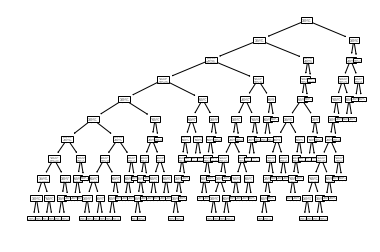

In [61]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(x_train_encoded, y_train)
tree.plot_tree(clf.fit(x_train_encoded, y_train)) ;

In [62]:
x_train_encoded

<6499x10952 sparse matrix of type '<class 'numpy.float64'>'
	with 181972 stored elements in Compressed Sparse Row format>

In [63]:
tree.export_graphviz(clf,out_file="teste.dot")

In [64]:
df=pd.DataFrame({'Real':y_test, 'Previsão':y_pred})
df.head(2)

Real  Previsão
0     1       1.0
1     1       1.0

### DECISION TREE COM DADOS CONCATENADOS

Agora iremos repetir o mesmo processo, porém vamos concatenar as colunas dos resultados do time vermelho e azul, tendo em vista que elas são complementares. 

In [65]:
# Concatenando as colunas 'rResult' e 'bResult'
columnsb=['bResult', 'blueTeamTag', 'blueTop', 'blueTopChamp', 'blueJungle','blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC','blueADCChamp', 'blueSupport', 'blueSupportChamp']
columnsr=['rResult', 'redTeamTag', 'redTop','redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle','redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport','redSupportChamp']
columns=['Result', 'TeamTag', 'Top','TopChamp', 'Jungle', 'JungleChamp', 'Middle','MiddleChamp', 'ADC', 'ADCChamp', 'Support','SupportChamp']

dados_b = dados[columnsb]
dados_b.columns = columns
dados_r = dados[columnsr]
dados_r.columns = columns

# treinamento
dados_concat = pd.concat([dados_b, dados_r]).dropna()

In [66]:
dados_bt = dados_testes[columnsb]
dados_bt.columns = columns
dados_rt = dados_testes[columnsr]
dados_rt.columns = columns

# teste
teste_concat = pd.concat([dados_bt, dados_rt]).dropna()
teste_concat.head(2)

Result TeamTag   Top TopChamp    Jungle JungleChamp   Middle MiddleChamp  \
0       1     GCU  Solo     Shen  Santorin    JarvanIV      Fly     Orianna   
1       1     CNB   Lep   Maokai   Minerva      Graves  Tinowns      Syndra   

      ADC ADCChamp Support SupportChamp  
0  Rikara    Sivir   Whyin       Thresh  
1     pbO     Jhin  Woswos     Malzahar

In [67]:
from sklearn import tree
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

### Separando Treinamento e Teste

In [68]:
y_train2 = dados_concat['Result']
x_train2 = dados_concat.drop(columns='Result')
y_test2 = teste_concat['Result']
x_test2 = teste_concat.drop(columns=['Result'])

### Convertendo as variáveis categóricas em quantitativas

In [69]:
# utilizamos o OneHotEncoder para fazer essa conversão
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded2 = encoder.fit_transform(x_train2.astype(str).values)

### Implementando o modelo

In [70]:
regressor2 = DecisionTreeRegressor()
regressor2.fit(x_train_encoded2, y_train2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [71]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train_encoded2, y_train2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [72]:
dados_testes.dropna(inplace=True)

### Agora vamos testar a acurácia do modelo:

In [73]:
x_test_encoded2 = encoder.transform(x_test2.astype(str).values)

# Testa modelo
y_pred2 = regressor2.predict(x_test_encoded2)

In [74]:
y_test2=list(map(int, y_test2))
y_pred2=list(map(int, y_pred2))

In [75]:
# Cálcula acurácia
acc = accuracy_score(y_test2, y_pred2)
print("Acurácia: {0}".format(acc))

Acurácia: 0.5524193548387096


In [76]:
df2=pd.DataFrame({'Real':y_test2, 'Previsão':y_pred2})
df2.head(1)

Real  Previsão
0     1         1

### DUMMIFY

Primeiramente utilizamos a função duymmify para converter as variáveis categóricas em quantitativas, porém como essa função cria uma nova base de dados, por fim, optamos por utilizar o OneHotEncoder.

In [77]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [78]:
d = dummify(dados_concat, 'Top')
colunas = ['TeamTag','TopChamp','Jungle','JungleChamp','Middle','MiddleChamp','ADC','ADCChamp','Support','SupportChamp']
for i in colunas:
    d= dummify(d,i)
    
d.head(1)

Result  Top_957  Top_3z  Top_ADD  Top_AJ  Top_AJun  Top_Acce  Top_Achie  \
0       0        0       0        0       0         0         0          0   

   Top_Acorn  Top_Air        ...          SupportChamp_Trundle  \
0          0        0        ...                             0   

   SupportChamp_TwistedFate  SupportChamp_Udyr  SupportChamp_Vayne  \
0                         0                  0                   0   

   SupportChamp_Veigar  SupportChamp_Velkoz  SupportChamp_Zac  \
0                    0                    0                 0   

   SupportChamp_Ziggs  SupportChamp_Zilean  SupportChamp_Zyra  
0                   0                    0                  0  

[1 rows x 2307 columns]

In [79]:
t = dummify(teste_concat, 'Top')
colunas = ['TeamTag','TopChamp','Jungle','JungleChamp','Middle','MiddleChamp','ADC','ADCChamp','Support','SupportChamp']
for i in colunas:
    t= dummify(t,i)
t.head(1)

Result  Top_957  Top_3z  Top_957'  Top_ADD  Top_AJ  Top_AJun  Top_Acce  \
0       1        0       0         0        0       0         0         0   

   Top_Achie  Top_Acorn        ...          SupportChamp_Soraka  \
0          0          0        ...                            0   

   SupportChamp_Syndra  SupportChamp_TahmKench  SupportChamp_Taric  \
0                    0                       0                   0   

   SupportChamp_Thresh  SupportChamp_Trundle  SupportChamp_Veigar  \
0                    1                     0                    0   

   SupportChamp_Velkoz  SupportChamp_Zilean  SupportChamp_Zyra  
0                    0                    0                  0  

[1 rows x 1797 columns]